In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from pyvis import network
#import graph_tool.all as gt

C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
countries_df = pd.read_csv('countries.csv')

In [3]:
iso_names = pd.read_csv('trade_country_iso.csv')

In [4]:
def iso_to_country(iso):
    return iso_names[iso_names['iso3'] == iso]['state_name'].values[0]

In [5]:
""" Creating a network edge list in the form of a pandas dataframe. """
year = 2018  # The year of the
year_df = countries_df[countries_df['year'] == year].drop(columns=['year'])
tempe_df = year_df.drop(columns=['import'])
tempi_df = year_df.drop(columns=['export'])
edge_list = pd.concat([tempe_df.rename(columns={'reporter': 'Source','partner': 'Target','export': 'Weight'}), tempi_df.rename(columns={'reporter': 'Target','partner': 'Source', 'import': 'Weight'})])
edge_list = edge_list.groupby(['Source','Target']).agg({'Weight':'mean'}).reset_index().dropna()

# Creating a cutoff for the minimum amount of trade between countries at $1 Billion USD
#edge_list = edge_list[edge_list['Weight'] > 1000000]

# Converting ISOs to country names for visualisation
edge_list['Source'] = edge_list['Source'].apply(iso_to_country)
edge_list['Target'] = edge_list['Target'].apply(iso_to_country)

# Exporting edge list to a csv file
edge_list.to_csv('trade_edge_list.csv', index=False)

In [6]:
edge_list.info()
edge_list.head()
pd.concat([edge_list['Source'],edge_list['Target']]).nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 31986 entries, 0 to 35689
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  31986 non-null  object 
 1   Target  31986 non-null  object 
 2   Weight  31986 non-null  float64
dtypes: float64(1), object(2)
memory usage: 999.6+ KB


239

C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\networkx\drawing\nx_pylab.py:605: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = self.node_size[self.nodelist.index(source)]
C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\networkx\drawing\nx_pylab.py:606: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = self.node_size[self.nodelist.index(target)]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\AKaiz\\Documents\\Year 3\\Dissertation\\code\\Networks\\trade\\outputs\\TradeNetworkX.png'

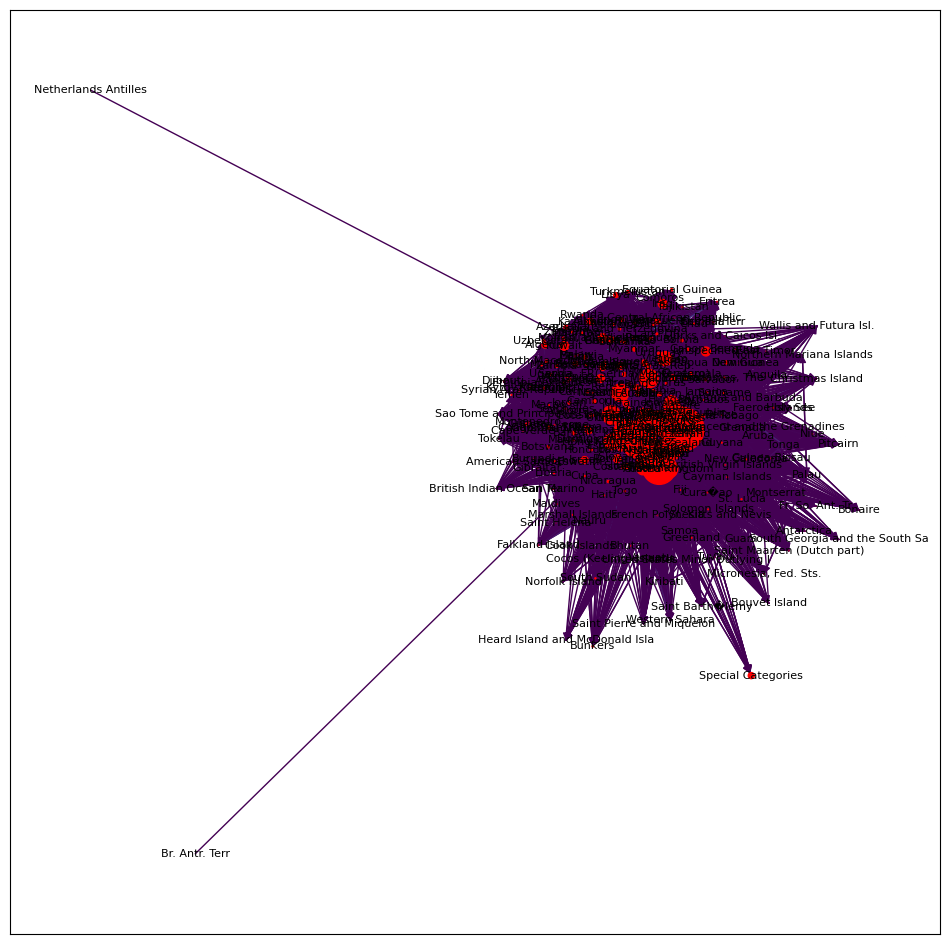

In [7]:
""" Visualising the network using networkx and matplotlib.

    The goal of this exercise is not to create a perfectly accurate
    network but a good visualisation of one. """

# Removing these as they have so few connections they make the graph smaller
#edge_list = edge_list[edge_list['Source'] != 'BAT']  # British Antarctic Territory
#edge_list = edge_list[edge_list['Target'] != 'BAT']  # British Antarctic Territory
#edge_list = edge_list[edge_list['Target'] != 'ATF']  # French Southern and Antarctic Lands

G = nx.from_pandas_edgelist(edge_list, source='Source', target='Target', edge_attr=True,create_using=nx.DiGraph())

# Create a relative size for each node based on the total exports of the country
total_exports = edge_list.groupby('Source').agg({'Weight':'sum'})
node_sizes = total_exports['Weight'] / total_exports['Weight'].max() * 1000

# Normalize the exports of each dyad to create a scalar between 0 and 1
# zi = (xi – min(x)) / (max(x) – min(x))
normalised_weights = list((edge_list['Weight'] - edge_list['Weight'].min()) / (edge_list['Weight'].max() - edge_list['Weight'].min()).astype(int))

# Colour of edges
edge_cmap = plt.cm.viridis

# Plotting the Trade Network with networkx
plt.figure(figsize=(12, 12))
nx.draw_networkx(G,nodelist=list(node_sizes.keys()), node_size=node_sizes, with_labels=True, font_size=8, node_color='red', edge_color=normalised_weights, edge_cmap=edge_cmap, pos=nx.spring_layout(G))
plt.savefig('./outputs/TradeNetworkX.png')

C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

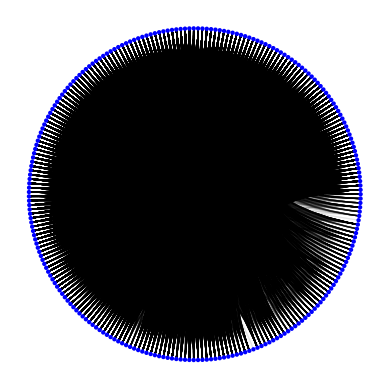

In [5]:
""" Creating a circos plot of the network """
circos = nv.CircosPlot(G)
circos.draw()
circos.save('./witsimg/TradeCircosX.png')
plt.show()
plt.savefig('./witsimg/TradeCircosX.png')

In [ ]:
""" Creating an arc plot of the network """
arc = nv.ArcPlot(G)
arc.draw()
plt.show()
plt.savefig('./witsimg/TradeArcX.png')

In [ ]:
vis_network = network.Network('1920px','1080px', notebook=True,filter_menu=True,heading='Trade Network')
vis_network.from_nx(G)
vis_network.show('TradeNetwork.html')

In [ ]:
total_exports = edge_list.groupby('Source').agg({'Weight':'sum'})
node_sizes = total_exports['Weight'] / total_exports['Weight'].max() * 1000
node_sizes